# 1) Data Cleaning Task: Remove Duplicates from a Dataset 

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("gpa_iq.csv");
data.head

<bound method NDFrame.head of     obs    gpa   iq  gender  concept
0     1  7.940  111       2       67
1     2  8.292  107       2       43
2     3  4.643  100       2       52
3     4  7.470  107       2       66
4     5  8.882  114       1       58
..  ...    ...  ...     ...      ...
73   85  9.000  112       1       60
74   86  9.500  112       1       70
75   87  6.057  114       2       51
76   88  6.057   93       1       21
77   89  6.938  106       2       56

[78 rows x 5 columns]>

In [3]:
df=pd.DataFrame(data)

In [4]:
# Remove duplicates
df_cleaned = df.drop_duplicates()
print(df_cleaned)

    obs    gpa   iq  gender  concept
0     1  7.940  111       2       67
1     2  8.292  107       2       43
2     3  4.643  100       2       52
3     4  7.470  107       2       66
4     5  8.882  114       1       58
..  ...    ...  ...     ...      ...
73   85  9.000  112       1       60
74   86  9.500  112       1       70
75   87  6.057  114       2       51
76   88  6.057   93       1       21
77   89  6.938  106       2       56

[78 rows x 5 columns]


In [5]:
# Replace missing values in 'gpa' and 'iq' columns with median
df_cleaned['gpa'].fillna(df_cleaned['gpa'].median(), inplace=True)
df_cleaned['iq'].fillna(df_cleaned['iq'].median(), inplace=True)

# Replace missing values in 'gender' column with mode (most common value)
df_cleaned['gender'].fillna(df_cleaned['gender'].mode()[0], inplace=True)

print(df_cleaned)

    obs    gpa   iq  gender  concept
0     1  7.940  111       2       67
1     2  8.292  107       2       43
2     3  4.643  100       2       52
3     4  7.470  107       2       66
4     5  8.882  114       1       58
..  ...    ...  ...     ...      ...
73   85  9.000  112       1       60
74   86  9.500  112       1       70
75   87  6.057  114       2       51
76   88  6.057   93       1       21
77   89  6.938  106       2       56

[78 rows x 5 columns]


In [6]:
# Map gender values to consistent labels (e.g., 1 for Male, 2 for Female)
gender_mapping = {1: 'Male', 2: 'Female'}
df_cleaned['gender'] = df_cleaned['gender'].map(gender_mapping)

print(df_cleaned)

    obs    gpa   iq  gender  concept
0     1  7.940  111  Female       67
1     2  8.292  107  Female       43
2     3  4.643  100  Female       52
3     4  7.470  107  Female       66
4     5  8.882  114    Male       58
..  ...    ...  ...     ...      ...
73   85  9.000  112    Male       60
74   86  9.500  112    Male       70
75   87  6.057  114  Female       51
76   88  6.057   93    Male       21
77   89  6.938  106  Female       56

[78 rows x 5 columns]


# 2) Machine Learning Task: Predict Student Exam Scores

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [8]:
# Separating features (X) and target variable (y)
X = df_cleaned[['gpa', 'iq', 'gender']]
y = df_cleaned['concept']

# Performing one-hot encoding on the gender column
column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), ['gender'])],
    remainder='passthrough'
)
X_encoded = column_transformer.fit_transform(X)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [9]:
# Initializing and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Pranay PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# Predicting on the test set
y_pred = model.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Printing the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Accuracy: 0.06
Precision: 0.02
Recall: 0.06
F1-score: 0.03


C:\Users\Pranay PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Pranay PC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3) Data Visualization Task: Create graphs for GPA & IQ Data


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

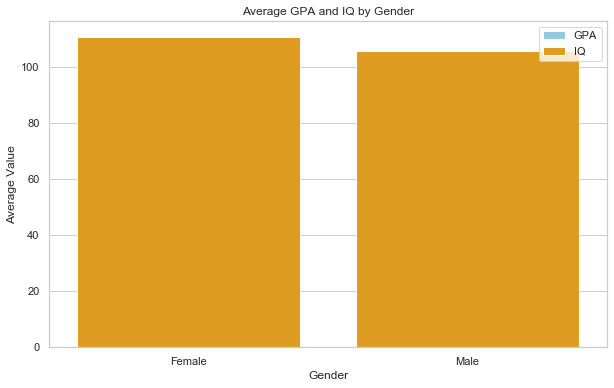

In [12]:
gender_avg_data = df_cleaned.groupby('gender')[['gpa', 'iq']].mean().reset_index()

# Setting a style of the plot
sns.set(style="whitegrid")

# Creating a bar plot using Seaborn
plt.figure(figsize=(10, 6))

# Ploting GPA for each gender
sns.barplot(x='gender', y='gpa', data=gender_avg_data, color='skyblue', label='GPA')

# Ploting IQ for each gender
sns.barplot(x='gender', y='iq', data=gender_avg_data, color='orange', label='IQ')

# Adding labels and title
plt.xlabel('Gender')
plt.ylabel('Average Value')
plt.title('Average GPA and IQ by Gender')

# Showing the plot within the Jupyter Notebook environment
plt.legend()
plt.show()